### Easy example for one tree without substructure

After installing classic_trees one can import it

In [1]:
import classic_trees as ct

First we creat an instance of  the class 'Forest'

In [2]:
merger_tree = ct.Forest()

Then we need to set the cosmology

In [3]:
merger_tree.set(pk_method='file',                      # one of two methods; here for speed a pre-computed Power-Spectrum, other method is directly running class to get it
                file='./PowerSpectra/pk_class.txt',    # relative path two the Power-Spectrum file
                h_units = True,                        # multiplies the Power-Spectrum values by h^3 if needed
                cosmo_params = {'h':0.6781,            #
                             'Omega_m':0.309974,       # cosmological parameters as one would set in class
                             'Omega_Lambda':0.690026}, # also add_cosmo_params for more then the three listed here
                verbose_level=1)                       # level of verbosity, here set to 1 to see some basic output of the code

After setting the cosmology we can e.g. run the following line to get one merger tree

In [4]:
merger_tree.compute_serial(mass = 1e13,              # mass of the halo today in M_sun/h
                           n_halo_max = 1000000,     # number of maximum halos that can be within a merger tree
                           file_name = None,         # file_name; has to be set to .hdf5 which is the output-format in classic_trees
                           random_mass = None,       # random mass that can be drawn either from the Press-Schechter or Sheth-Torman approximation or neither for same mass trees; masses in M_sun/h
                           m_max = 1e16,             # maximum mass to draw masses from in M_sun/h
                           m_min = 1e11,             # minimum mass to draw masses from in M_sun/h
                           BoxSize = 479.0,          # Boxsize of the simulation volume in (Mpc/h)^3
                           n_steps = 10,             # number of timesteps of the tree
                           m_res = 1e8,              # mass resolution in M_sun/h
                           n_tree = 1,               # number of trees to be computed
                           i_seed_0 = -8635,         # seed to generate always the same random trees
                           a_halo = 1,               # scale factor today
                           z_max = 4,                # redshift to which the tree is tracked
                           time_spacing = 'equal_a', # spacing of the times between z = 0 and z = z_max; either equal in a or z, or a list of scale factors or redshifts that is custom
                           subhalos = False)         # mode of the algorithm; False means no substructure True means substructure


z =  0.0  at which delta_crit =  1.6758691042660168
z =  0.09756097560975618  at which delta_crit =  1.7658470262762047
z =  0.21621621621621623  at which delta_crit =  1.8818903789826742
z =  0.36363636363636354  at which delta_crit =  2.034789891972567
z =  0.5517241379310347  at which delta_crit =  2.2412580818924415
z =  0.7999999999999998  at which delta_crit =  2.528355639625441
z =  1.1428571428571428  at which delta_crit =  2.943155456828088
z =  1.6470588235294117  at which delta_crit =  3.5758529989382586
z =  2.4615384615384617  at which delta_crit =  4.625016297667957
z =  4.0  at which delta_crit =  6.639562987045919
Number of nodes in tree 1 is 9548
Example information from tree:
Base node: 
  mass = 10000000000000.0  z=  0.0  number of progenitors  114
First progenitor: 
  mass = 9749958130313.54  z=  0.09756097560975618


### Example for ten tree with substructure and the Halo Mass Function (HMF)

After we ran the above we can start directly by computing the substructure tree

In [5]:
merger_tree.compute_serial(mass = None,              # mass of the halo today in M_sun/h
                           n_halo_max = 1000000,     # number of maximum halos that can be within a merger tree
                           file_name = None,         # file_name; has to be set to .hdf5 which is the output-format in classic_trees
                           random_mass = 'ST',       # random mass that can be drawn either from the Press-Schechter or Sheth-Torman approximation or neither for same mass trees; masses in M_sun/h
                           m_max = 1e16,             # maximum mass to draw masses from in M_sun/h
                           m_min = 1e11,             # minimum mass to draw masses from in M_sun/h
                           BoxSize = 479.0,          # Boxsize of the simulation volume in (Mpc/h)^3
                           n_steps = 10,             # number of timesteps of the tree
                           m_res = 1e8,              # mass resolution in M_sun/h
                           n_tree = 10,              # number of trees to be computed
                           i_seed_0 = -8635,         # seed to generate always the same random trees
                           a_halo = 1,               # scale factor today
                           z_max = 4,                # redshift to which the tree is tracked
                           time_spacing = 'equal_a', # spacing of the times between z = 0 and z = z_max; either equal in a or z, or a list of scale factors or redshifts that is custom
                           subhalos = True)          # mode of the algorithm; False means no substructure True means substructure


z =  0.0  at which delta_crit =  1.6758691042660168
z =  0.09756097560975618  at which delta_crit =  1.7658470262762047
z =  0.21621621621621623  at which delta_crit =  1.8818903789826742
z =  0.36363636363636354  at which delta_crit =  2.034789891972567
z =  0.5517241379310347  at which delta_crit =  2.2412580818924415
z =  0.7999999999999998  at which delta_crit =  2.528355639625441
z =  1.1428571428571428  at which delta_crit =  2.943155456828088
z =  1.6470588235294117  at which delta_crit =  3.5758529989382586
z =  2.4615384615384617  at which delta_crit =  4.625016297667957
z =  4.0  at which delta_crit =  6.639562987045919
Number of nodes in FoF-group tree 1 is 14
Example information from FoF-group tree:
Base node: 
  mass = 1700128276499.6309  z=  0.0  number of progenitors  1
First progenitor: 
  mass = 1647360495157.3738  z=  0.09756097560975618
Number of subhalos in first FoF-group:  16
Number of nodes in FoF-group tree 2 is 9
Example information from FoF-group tree:
Base no

One can also get the HMF out of the computed merger tree. In order to make the HMF accessible we will make some plots:

In [6]:
import matplotlib.pyplot as plt

At redshift z=0

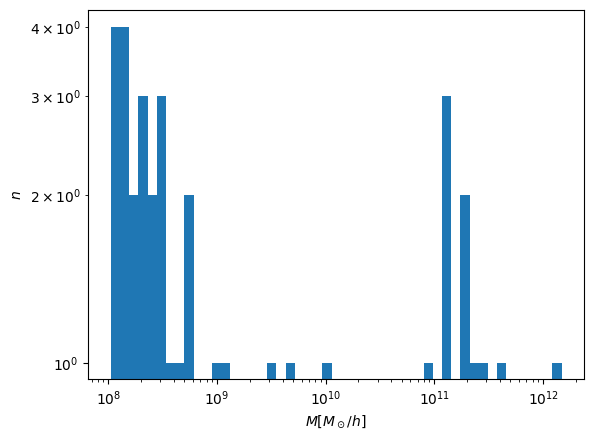

In [7]:
bin_0, bin_edges_0 = merger_tree.hmf_at_z(0.0)

plt.hist(bin_edges_0[:-1],bin_edges_0,weights=bin_0)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$M [M_\odot/h]$')
plt.ylabel(r'$n$')
plt.show()

At redshift z=4

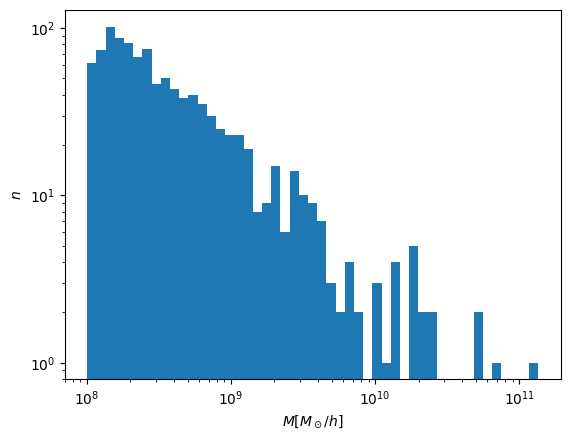

In [8]:
bin_4,bin_edges_4 = merger_tree.hmf_at_z(4.0)

plt.hist(bin_edges_4[:-1],bin_edges_4,weights=bin_4)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$M [M_\odot/h]$')
plt.ylabel(r'$n$')
plt.show()